In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('SensorReadings2025.csv', delimiter=';')

/Users/davidkolet-tassara/Documents/GitHubRepo/AirQualityAnalysis/.venv/lib/python3.13/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


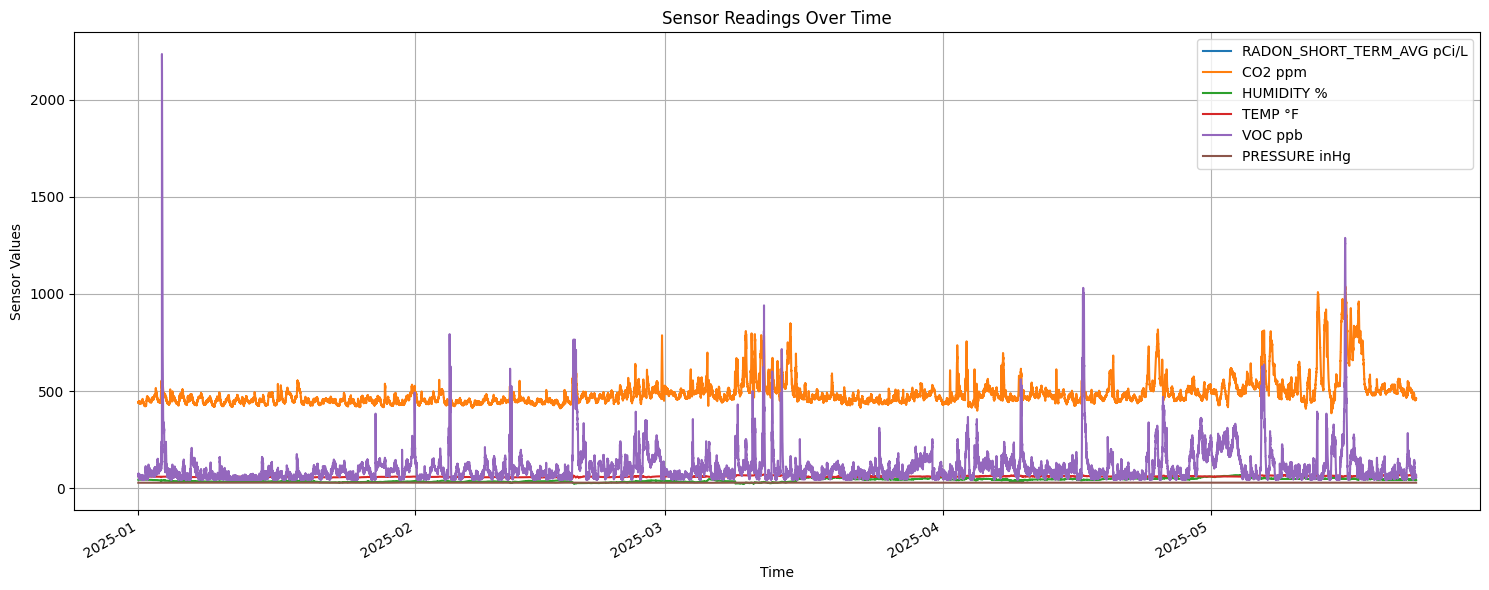

In [3]:
# Convert timestamps with mixed ISO 8601 formats
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='mixed', errors='coerce')

# Drop any rows where datetime conversion failed
df = df.dropna(subset=[df.columns[0]])

# Set the datetime column as the index
df = df.set_index(df.columns[0])

# Plot all columns as line plots
df.plot(figsize=(15, 6), title='Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.grid(True)
plt.tight_layout()
plt.show() 

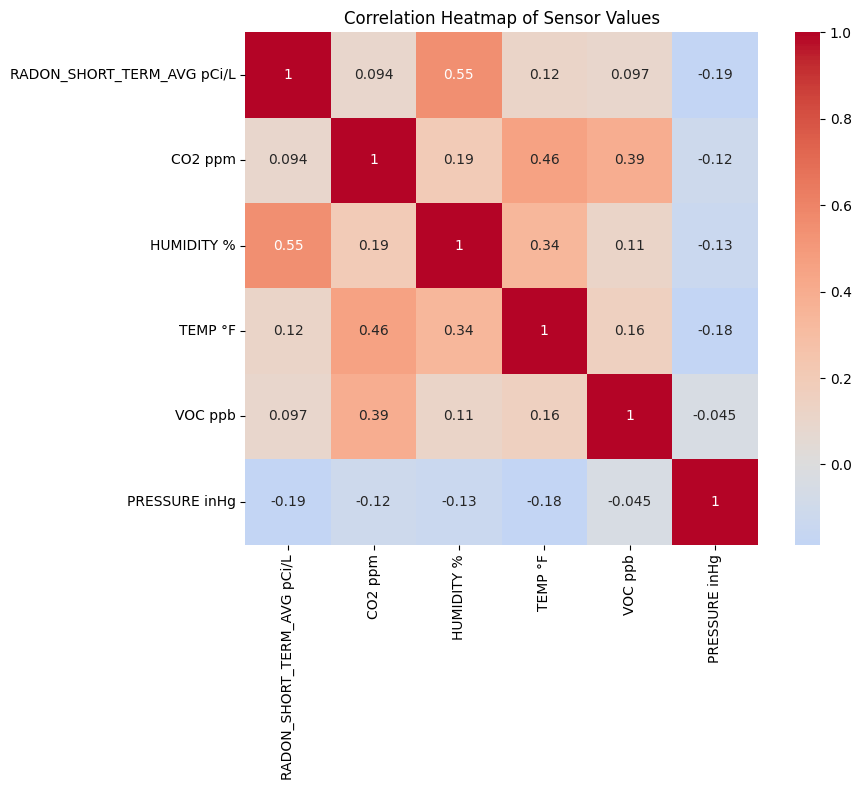

In [4]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Sensor Values')
plt.tight_layout()
plt.show()

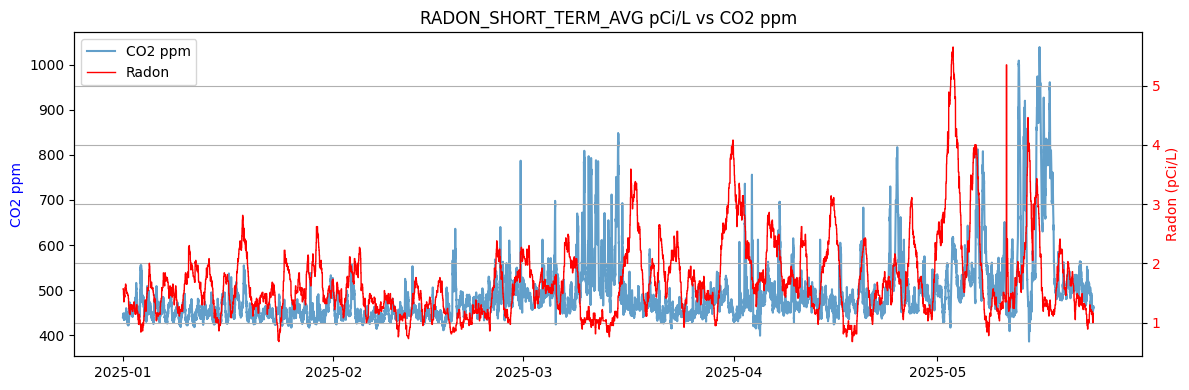

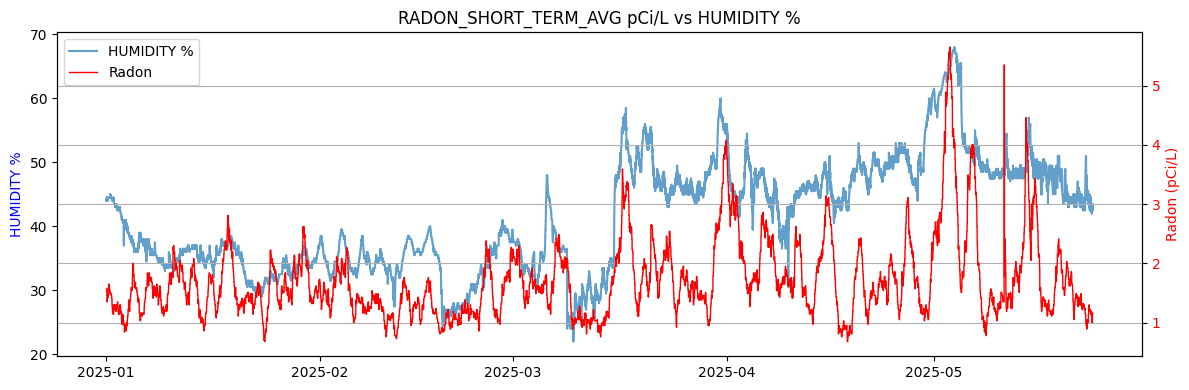

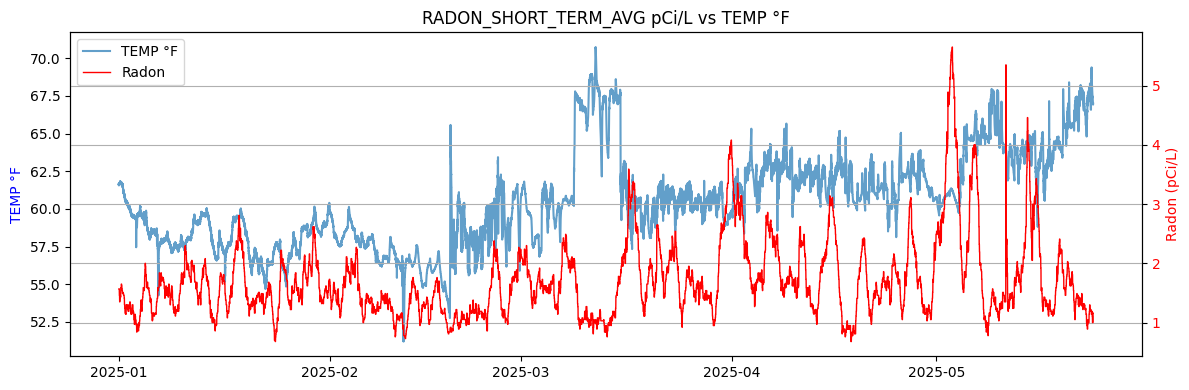

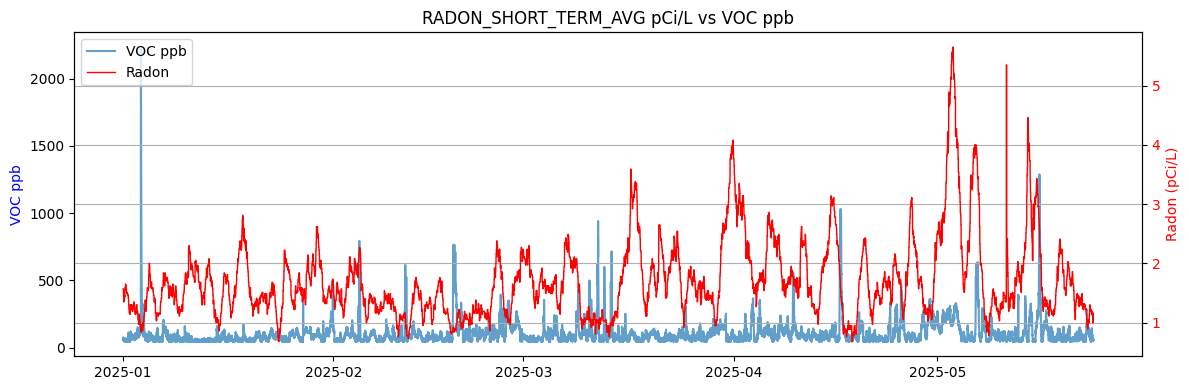

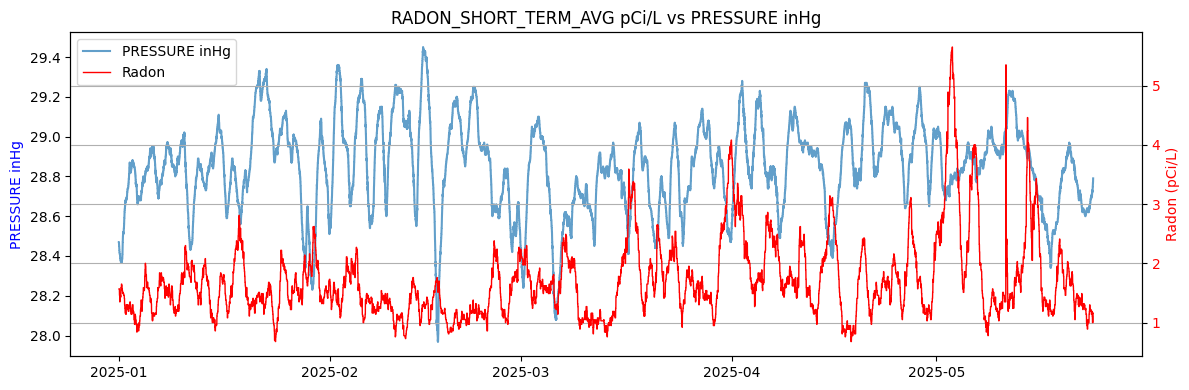

In [5]:
radon_column = 'RADON_SHORT_TERM_AVG pCi/L'
other_columns = [col for col in df.columns if col != radon_column]

# Forward-fill radon values so they align with the other measurements
radon_filled = df[radon_column].ffill()

for col in other_columns:
    fig, ax1 = plt.subplots(figsize=(12, 4))

    # Plot the other sensor on the primary y-axis
    ax1.plot(df.index, df[col], label=col, alpha=0.7)
    ax1.set_ylabel(col, color='blue')
    ax1.tick_params(axis='y')

    # Plot the Radon data (with forward-filled values) on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df.index, radon_filled, label='Radon', color='red', linewidth=1)
    ax2.set_ylabel('Radon (pCi/L)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(f'{radon_column} vs {col}')
    plt.grid(True)
  
  # Combine legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    fig.tight_layout()
    plt.show()

In [6]:
evedf = pd.read_csv('EveHumiditySensorData.csv')
evedf = evedf[['Timestamp', 'Humidity %', 'Room']]
evedf['Timestamp'] = pd.to_datetime(evedf['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

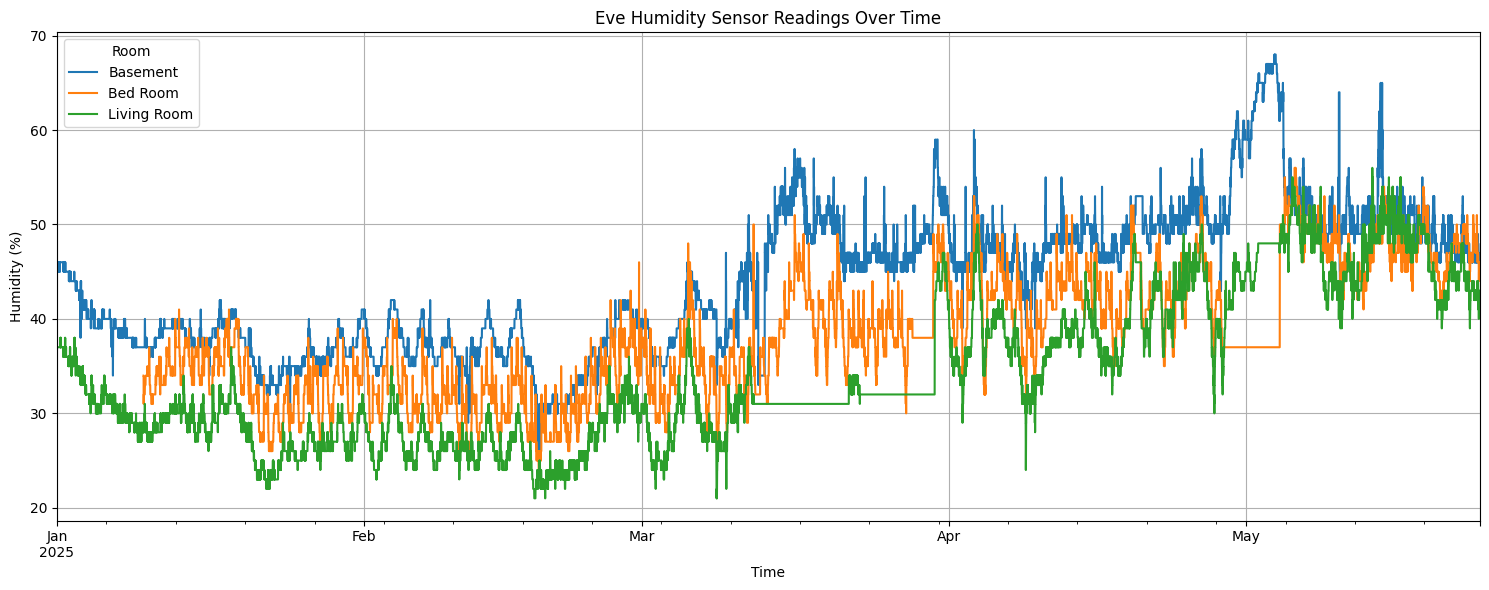

In [7]:
evedfpivot = evedf.pivot(index='Timestamp', columns='Room', values='Humidity %')

# Resample to uniform 5-minute intervals and forward fill missing values
evedfpivot = evedfpivot.resample('5min').mean().ffill()

# Plotting
evedfpivot.plot(figsize=(15, 6), title='Eve Humidity Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.legend(title='Room')
plt.tight_layout()
plt.show()

In [8]:
evecorr = evedfpivot.corr()
print(evecorr)

Room         Basement  Bed Room  Living Room
Room                                        
Basement     1.000000  0.735232     0.835993
Bed Room     0.735232  1.000000     0.859935
Living Room  0.835993  0.859935     1.000000


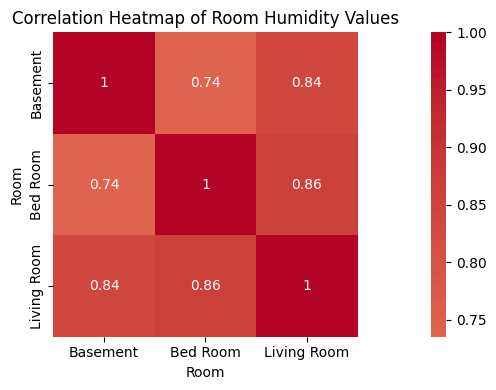

In [9]:
plt.figure(figsize=(15, 4))
sns.heatmap(evecorr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Room Humidity Values')
plt.tight_layout()
plt.show()

In [10]:
df['RADON_SHORT_TERM_AVG pCi/L'].describe()

count    3423.000000
mean        1.710871
std         0.679613
min         0.680000
25%         1.240000
50%         1.570000
75%         1.970000
max         5.650000
Name: RADON_SHORT_TERM_AVG pCi/L, dtype: float64

In [15]:
print(df['RADON_SHORT_TERM_AVG pCi/L'].quantile(0.99))
print(df['RADON_SHORT_TERM_AVG pCi/L'].quantile(0.95))
print(df['RADON_SHORT_TERM_AVG pCi/L'].quantile(0.90))

4.103399999999993
3.05
2.54
